### Name: Tan Ngiap Chuan Alvin ###

# AML Practicum 1: K-means Algorithm # 

---

### Abstract ###
To implement k-means algorithm to learn the clustering partitioning method from the
training data.
To apply k-means group dots representing lightning strokes.
To familiarize with determining the parameter for k-means.

Using M=[0,0], we computed the error as 86.62495736289799. <br>
Using first 5 XY-coords of X as centroids (K=5), the error is reduced to 9.73227985727934 <br>
After running calcMeans() and Group() (K=5), the error is reduced to 4.006100077883563 <br>
After running K=50, the error is reduced to 0.9216408380317802 <br>
After running K=100, the error is reduced to 0.5725156609427651 <br>

Given a choice of either K=50 and K=100, we would prefer the K=50 over K=100 as the difference between the 0.92 error of K=50 and 0.57 error of K=100 is less than 0.50. In fact, both error yield an error of less than 1.0. Coupled with the visual challenge of 'over-clustering' on a plot, we would prefer the K=50 over K=100.

---

### Introduction ###
Lightning networks detect individual lightning discharge events all over the world. Understanding the lightning activities over every unique geography location over space and time will help us to better manage any economic damages and human safety that could arise from lightning activities. <br>

For each lightning event, the data is stored as (time, amount of discharge, latitude, and longitude). It shows that when and where, there is a lightening stroke with certain amount of discharge. <br>

We will implement a k-means clustering algorithm to help the meteorologists to group the lightning strokes basing on the position.

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.
We define a target number k, which refers to the number of centroids needed in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
Every data point is allocated to each of the clusters through reducing the in-cluster euclidean distance.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

---

In [20]:
# import the libraries for programming
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def loadData(name):
    '''
    Objective: To load the file and convert to numpy array
    Input: filename (string)
    Output: X dataset (array) 
    '''
    df = pd.read_csv(name, delimiter = "\t", header = None)
    return df.to_numpy()

In [3]:
file_name = '2010825.txt'                                # get the file name
col_3 = np.zeros(16259).reshape(16259, 1)                # create all zeros in col_3
X = np.concatenate((loadData(file_name), col_3), axis=1) # concatenate col_3 to X horizontally 

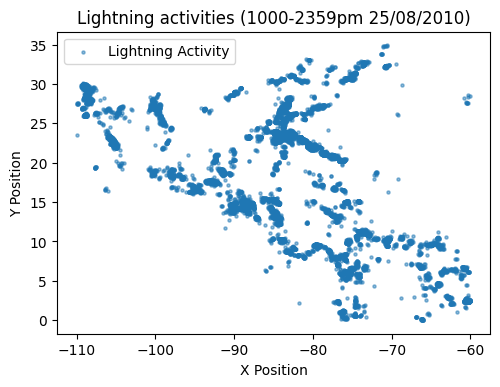

In [4]:
fig=plt.figure(dpi=100)
plt.scatter(X.T[0], X.T[1], alpha=0.5, label='Lightning Activity', s=5) # use X and Y pts to plot 'Lightning' points 
plt.legend()  # s=area, c=colors, alpha=0.5
plt.title('Lightning activities (1000-2359pm 25/08/2010)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal')
fig.savefig("Lightning Strokes on 25 Aug 2010", format="svg")

In [5]:
def errorCompute(X, M):
    '''
    Objective: To compute the error as L2 norm
    Input: X dataset of 2 features + 1 ClusterID, mean value (M) for each cluster
           (both are arrays)
    Output: The value of objective function for the clustering (float)
    '''
    l2 = np.linalg.norm(X[:, :2] - M[X[:, 2].astype(int)], axis=1)
    return np.mean(l2)

In [6]:
def Group(X, M):
    '''
    Objective: Assign each object into a cluster bases on the current set of means (M)
    Input: X dataset of 2 features + 1 ClusterID, current mean (M)
           (both are arrays)
    Output: X with updated clusterID. Assign each object into its closest cluster
    '''
    for idx, i in enumerate(X[:,0:2]):                # iterate over 10 rows of X, col 1 and col 2
        l2_norm = np.sqrt(np.square(i[0] - M[:,0]) + np.square(i[1] - M[:,1])) # get the l2 norm value
        X[idx, 2] = np.argmin(l2_norm)                                         # populates col_2 with cluster IDs 
    return X

In [7]:
def calcMeans(X, M):
    '''
    Objective: Update the means (M) until there is no changes in clustering result
    Input: X dataset of 2 features + 1 ClusterID, current mean (M)
           (both are arrays)
    Output: The updated mean value(M) for each cluster
    '''
    for count in range(100):
        X = Group(X, M) # call the Group function
        centroid_XY = {i:[] for i in range(0,M.shape[0])} # create dict for xy_coords, K = M.shape[0]
        for i in X[:,0:2]:                # iterate over 10 rows of X, col 1 and col 2
            l2_norm = np.sqrt(np.square(i[0] - M[:,0]) + np.square(i[1] - M[:,1])) # get the l2 norm value
            centroid_XY[np.argmin(l2_norm)].append(i)                              # append xy_coord to their k-v pair
    #### ------------------------------------------------------------------ #####
        old = M                                           # assign current M centroid matrix to old var b4 update M
        centroid_list = [np.array(i) for i in centroid_XY.values()] # extract xy coords of each centroid into a list
        M = np.array([0,0])           # dummy array for vstacking purpose
        for xy in centroid_list:      # for each pair of xy_coord in list
            x_pts = xy.T[0]           # get all x_coords of a centroid
            y_pts = xy.T[1]           # get all y_coords of a centroid
            row = np.array([np.mean(x_pts), np.mean(y_pts)]) # assign xy_mean pairs to row
            M = np.vstack((M, row))   # create M matrix
        M = M[1:]                     # get rid of dummy array
    #### ------------------------------------------------------------------ #####
        print(f'Running {count+1} epochs in progress ...')
        if np.array_equal(old, M):  # if no change in centroids' XY coords, break loop 
            print(f'Centroids unchanged after {count+1} epochs\n')
            print(f'M after {count+1} epoch:\n{M}\n')
            break
    return M, centroid_XY  

---
### TASKS - Part 3C: Clustering Objective Function

#### Given:
• 𝑛 objects <br>
• 𝑘 represents number of clusters <br>

#### K-mean objective function: 
#### 𝑑(𝑜, 𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑&) ####

#### Euclidean Metric in the objective function:

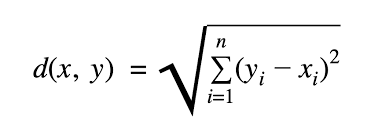

---
### TASKS - Part 3D: errCompute()

In [8]:
M = np.array([[0,0]]) # M.shape is (1,2)
print(f'Using M=[0,0] the error is {errorCompute(X, M)}')

Using M=[0,0] the error is 86.62495736289799


---
### TASKS - Part 3E: Method Explanation

#### Working mechanism of the method of assigning each object to a cluster:

K-mean objective function will ... <br>
• Groups 𝑛 objects into 𝑘 clusters by minimizing the 𝐸 <br>
• Find 𝑘 centroids that minimize 𝐸 <br>
• Centroid is an actual object centrally located in a cluster <br>

---
### TASKS - Part 3F: Group()

In [9]:
M=np.copy(X[0:5,0:X.shape[1]-1])
X = Group(X, M)
error = errorCompute(X, M)
print(f'Using first 5 XY-coords of X as centroids, the error is {error}')

Using first 5 XY-coords of X as centroids, the error is 9.73227985727934


In [21]:
# save the inital means of 5 centroids for K=5 means clustering
with open('K5_initial_mean.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in M) 

---
### TASKS - Part 3G: Describe the method to complute new means 

#### Steps to calculate the new means based on current clustering:
• Step1: Randomly select k number of centroids <br>
• Step2: Assign each sample into the class represented by the closest centroids <br>
• Step3：Update centroids as mean of the cluster based on the latest set of assigned data points<br>
• Step4：Repeat step2 and step3 until convergence <br>

---
### TASKS - Part 3H: Run k-means with K=5

In [10]:
# print(M)
M, xy_5 = calcMeans(X, M)

Running 1 epochs in progress ...
Running 2 epochs in progress ...
Running 3 epochs in progress ...
Running 4 epochs in progress ...
Running 5 epochs in progress ...
Running 6 epochs in progress ...
Running 7 epochs in progress ...
Running 8 epochs in progress ...
Running 9 epochs in progress ...
Running 10 epochs in progress ...
Running 11 epochs in progress ...
Running 12 epochs in progress ...
Running 13 epochs in progress ...
Running 14 epochs in progress ...
Running 15 epochs in progress ...
Running 16 epochs in progress ...
Centroids unchanged after 16 epochs

M after 16 epoch:
[[-105.19604652   25.33132344]
 [ -79.39863196   21.23281229]
 [ -82.67640192   26.06156976]
 [ -89.16882233   15.14357792]
 [ -72.13285047    8.21465361]]



In [11]:
error = errorCompute(X, M)
print(f'After running calcMeans() and Group(), the error is {error}')

After running calcMeans() and Group(), the error is 4.006100077883563


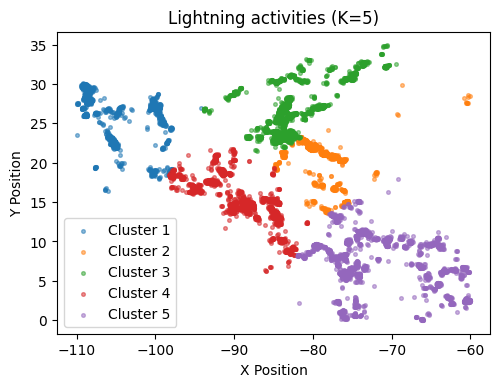

In [12]:
fig=plt.figure(dpi=100)
for key, value in xy_5.items(): # extract xy coords of each centroid into a list
    xx = np.array(value).T[0]  # get the x-coordinates
    yy = np.array(value).T[1]  # get the y-coordinates
    plt.scatter(xx, yy, alpha=0.5, label=f'Cluster {key+1}', s=7) # use X and Y pts to plot 'Lightning' points 
plt.legend()  # s=area, c=colors, alpha=0.5
plt.title('Lightning activities (K=5)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal')

---
### TASKS - Part 3I: Run k-means with K=50

In [13]:
M_50_initial = np.copy(X[0:50,0:X.shape[1]-1])
X = Group(X, M_50_initial)
M_50_final, xy_50 = calcMeans(X, M_50_initial)
error_50 = errorCompute(X, M_50_final)
print(f'After running K=50, the error is {error_50}')

Running 1 epochs in progress ...
Running 2 epochs in progress ...
Running 3 epochs in progress ...
Running 4 epochs in progress ...
Running 5 epochs in progress ...
Running 6 epochs in progress ...
Running 7 epochs in progress ...
Running 8 epochs in progress ...
Running 9 epochs in progress ...
Running 10 epochs in progress ...
Running 11 epochs in progress ...
Running 12 epochs in progress ...
Running 13 epochs in progress ...
Running 14 epochs in progress ...
Running 15 epochs in progress ...
Running 16 epochs in progress ...
Running 17 epochs in progress ...
Running 18 epochs in progress ...
Running 19 epochs in progress ...
Running 20 epochs in progress ...
Running 21 epochs in progress ...
Running 22 epochs in progress ...
Running 23 epochs in progress ...
Running 24 epochs in progress ...
Running 25 epochs in progress ...
Running 26 epochs in progress ...
Running 27 epochs in progress ...
Running 28 epochs in progress ...
Running 29 epochs in progress ...
Running 30 epochs in pr

In [23]:
# save the inital means of 50 centroids for K=50 means clustering
with open('K50_initial_mean.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in M_50_initial)

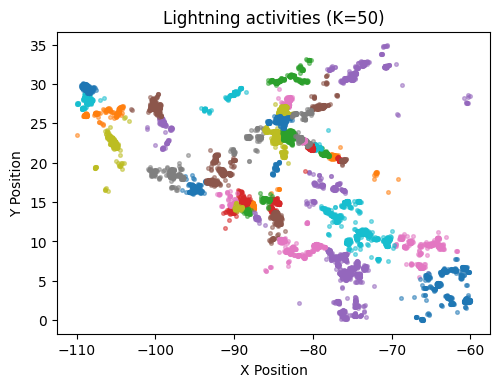

In [14]:
fig=plt.figure(dpi=100)
for key, value in xy_50.items(): # extract xy coords of each centroid into a list
    xx = np.array(value).T[0]  # get the x-coordinates
    yy = np.array(value).T[1]  # get the y-coordinates
    plt.scatter(xx, yy, alpha=0.5, label=f'Cluster {key+1}', s=7) # use X and Y pts to plot 'Lightning' points 
# plt.legend() 
plt.title('Lightning activities (K=50)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal')

---
### TASKS - Part 3I: Run k-means with K=100

In [15]:
M_100_initial = np.copy(X[0:100,0:X.shape[1]-1])
X = Group(X, M_100_initial)
M_100_final, xy_100 = calcMeans(X, M_100_initial)
error_100 = errorCompute(X, M_100_final)
print(f'After running K=100, the error is {error_100}')

Running 1 epochs in progress ...
Running 2 epochs in progress ...
Running 3 epochs in progress ...
Running 4 epochs in progress ...
Running 5 epochs in progress ...
Running 6 epochs in progress ...
Running 7 epochs in progress ...
Running 8 epochs in progress ...
Running 9 epochs in progress ...
Running 10 epochs in progress ...
Running 11 epochs in progress ...
Running 12 epochs in progress ...
Running 13 epochs in progress ...
Running 14 epochs in progress ...
Running 15 epochs in progress ...
Running 16 epochs in progress ...
Running 17 epochs in progress ...
Running 18 epochs in progress ...
Running 19 epochs in progress ...
Running 20 epochs in progress ...
Running 21 epochs in progress ...
Running 22 epochs in progress ...
Running 23 epochs in progress ...
Running 24 epochs in progress ...
Running 25 epochs in progress ...
Running 26 epochs in progress ...
Running 27 epochs in progress ...
Running 28 epochs in progress ...
Running 29 epochs in progress ...
Running 30 epochs in pr

In [24]:
# save the inital means of 100 centroids for K=100 means clustering
with open('K100_initial_mean.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in M_100_initial)

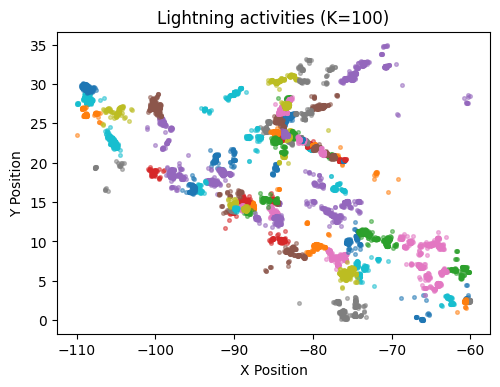

In [16]:
fig=plt.figure(dpi=100)
for key, value in xy_100.items(): # extract xy coords of each centroid into a list
    xx = np.array(value).T[0]  # get the x-coordinates
    yy = np.array(value).T[1]  # get the y-coordinates
    plt.scatter(xx, yy, alpha=0.5, label=f'Cluster {key+1}', s=7) # use x & y pts to plot 'Lightning' points 
# plt.legend() 
plt.title('Lightning activities (K=100)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal')

---

#### Discussion on which one (K=50 or K=100) is better ####

Based on the clustering plots of K=50 and K=100, we can see that both have at least 10 and 20 times more clusters than when K=5 respectively.

However, given a choice of either K=50 and K=100, we would prefer the K=50 over K=100 as the difference between the 0.92 error of K=50 and 0.57 error of K=100 is less than 0.50. In fact, both error yield an error of less than 1.0. Coupled with the visual challenge of 'over-clustering' on a plot, we would prefer the K=50 over K=100.

Clustering is useful and effective if we can find a right balance of error and visual-challenge of 'over-clustering', and given a choice, we would prefer K=5 for simple and easy labelling of lightning clusters.

---